<a href="https://colab.research.google.com/github/gandhirajj/MachineLearning-work/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib tensorflow


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Generate sine wave data
def generate_sine_wave(seq_length=50, num_samples=1000):
    x_values = np.linspace(0, 100, num_samples)
    y_values = np.sin(x_values)

    X, y = [], []
    for i in range(len(y_values) - seq_length):
        X.append(y_values[i:i + seq_length])
        y.append(y_values[i + seq_length])

    return np.array(X), np.array(y)

# Prepare dataset
seq_length = 50  # Number of time steps
X, y = generate_sine_wave(seq_length)

# Reshape input for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3441
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0125
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.9857e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.4295e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.8142e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.2327e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.9817e-05
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.3069e-05
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.4244e-05
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.9322e-05
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.0257e-05
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.5314e-06
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.1300e-06
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2125e-06
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


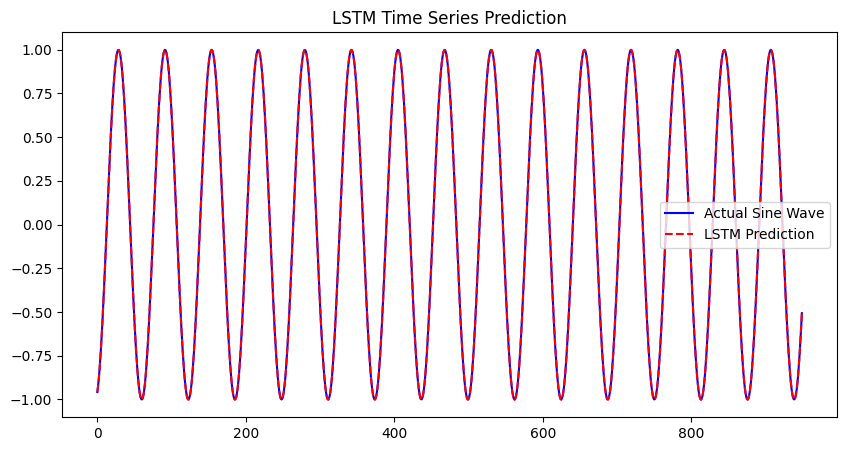

In [ ]:
# Predict on test data
predictions = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y, label="Actual Sine Wave", color="blue")
plt.plot(predictions, label="LSTM Prediction", color="red", linestyle="dashed")
plt.legend()
plt.title("LSTM Time Series Prediction")
plt.show()


In [ ]:
pip install scikit-learn matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for visualization
y = iris.target  # Target labels

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create an SVM model with RBF Kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)


SVC()

In [ ]:
# Predict on test data
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")


SVM Accuracy: 0.90


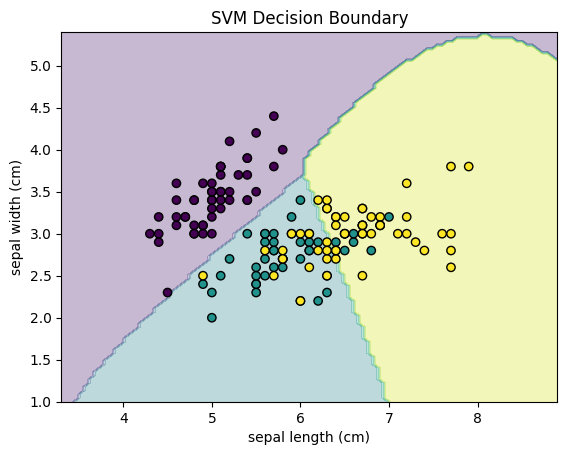

In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.viridis)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("SVM Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm_model, X, y)
